# Wholesale Customer Clustering

## Scenario

With the rapid development of the network, the sales model of merchants is constantly being updated. Nowadays, online shopping has become more and more common in daily life. A wholesaler made a questionnaire survey among his customers. The results of the survey showed that many customers prefer to order online to save on travel costs and find the products they need quickly. Thus, a wholesaler is considering to open a online store for their customers and offer discounts to customers. 

The wholesaler now wants to know the products, which are bought by the customer together so that the company could make better advertise and decide which offer should be applied according to this clustering experiment. The wholesaler has already collected a dataset of their cutomers. The dataset comprises the yearly spending in monetary units on diverse product categories. The wholesaler now asks data scientists to use their data for segmenting customers. 

## Method

Clustering is an unsupervised learning algorithm that cluster data based on their similarity. Therefore, to achieve our goal, I will experiment with various clustering techniques and compare the difference between the results. 

The structure of the project follows:
Preprocessing
Clustering
 - K-Means Algorithm
 - PCA Algorithm
 - HAC Algorithm
 - Analyse and compare the result
 - Segment the similar customer
 - Summary and compute advices based on my results 

## The dataset
This wholesale customer dataset was downloaded from the UCI Machine Learning Repository
There are 8 Features
 - Fresh
 - Milk
 - Grocery
 - Frozen
 - Detergents_paper
 - Delicatessen
 - Channel
 - Region

The data set is originated from a larger database referred on:

*Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon*

In [ ]:
import pandas as pd
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from matplotlib.ticker import ScalarFormatter
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.cluster import AgglomerativeClustering

## Load dataset

##### First of all, I gonna read the data file and get all the information about this dataset

In [565]:
dataset = pd.read_csv("Wholesale customers data.csv")
dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [566]:
# check the information about this dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [567]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [568]:
# check if there are any missing data
dataset.isna().sum

# As result shown that there are not any missing data in this dataset!

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0      False   False  False  False    False   False             False   
1      False   False  False  False    False   False             False   
2      False   False  False  False    False   False             False   
3      False   False  False  False    False   False             False   
4      False   False  False  False    False   False             False   
..       ...     ...    ...    ...      ...     ...               ...   
435    False   False  False  False    False   False             False   
436    False   False  False  False    False   False             False   
437    False   False  False  False    False   False             False   
438    False   False  False  False    False   False             False   
439    False   False  False  False    False   False             False   

     Delicassen  
0         False  
1         False  
2      

In [569]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Data Preprocessing

In [570]:
# drop channel and region fields
df = dataset.copy()
df.drop(['Region', 'Channel'], axis = 1, inplace = True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


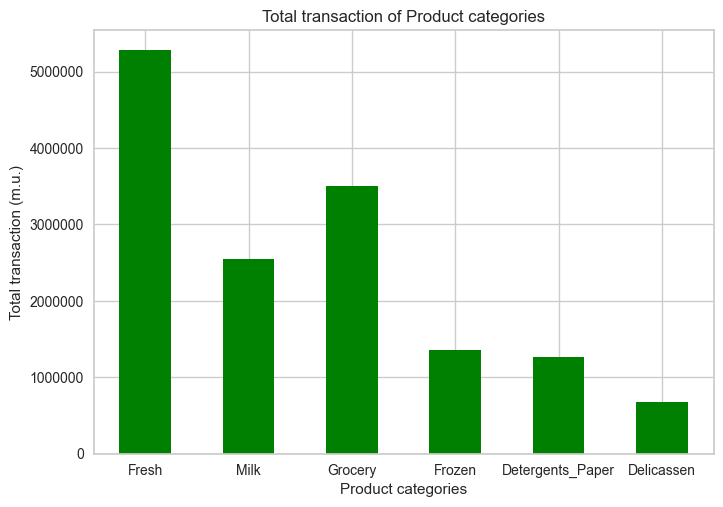

In [571]:
fig, ax = plt.subplots()
df.sum(axis=0).plot.bar(rot=0, color='green')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

ax.set_title('Total transaction of Product categories')
ax.set_xlabel('Product categories')
ax.set_ylabel('Total transaction (m.u.)')
plt.show()

> I calculate the total of each column(Product) and display it with bar chart. 
>
> As we can see above, the bar chart illustrates how many transactions of each product that the company trades. 
>
> In the bar chart it is simply to see the difference of business amount between these 6 products.
>
> Obviously, Fresh feature has a much higher transaction value than the other features, while delicassen has the least amount of purchase. 
>
>The transaction amount of Grocery and milk take the second and the third place in this diagramm. 
>
>Moreover, the purchase of frozen feature and detergents paper are much less than milk.

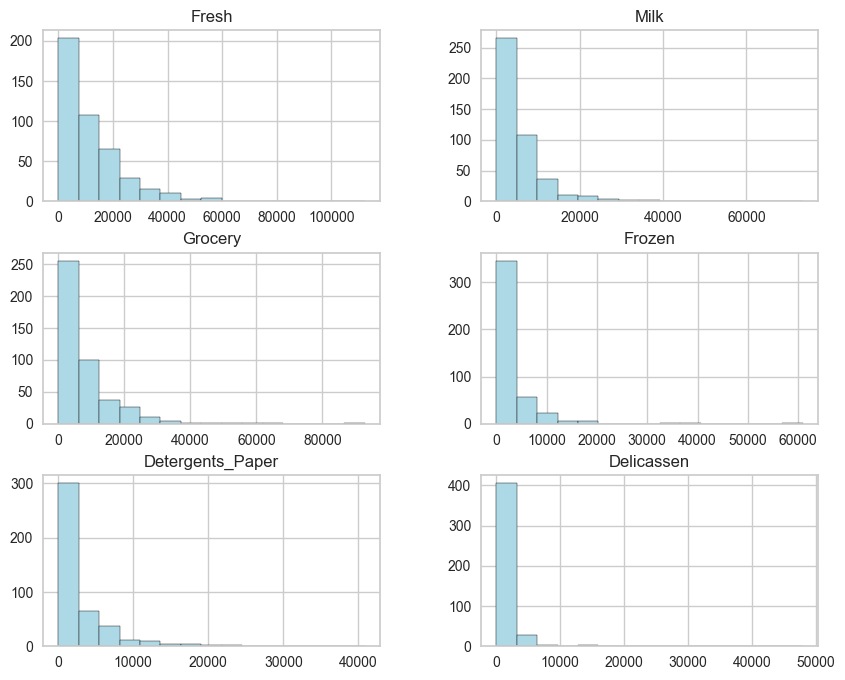

In [572]:
df.hist(figsize=(10,8),bins=15, color='lightblue', edgecolor='black')
plt.show()

> I display distribution of every Product with historical diagramm and set the distribution group(bin) as 15.
>
> As we can see in the diagramm, most of the points lie on the left, closer to the minimal value. 
>
> Take product grocery as example, most customers spending the amount between 0-20000 on grocery. However there is also consumer who spent 80000 on grocery in year.

> Next step I am interested to look for the correlationship between each product. 
>
> So I use the clustermap from the library seaborn to display the correlation about all the features

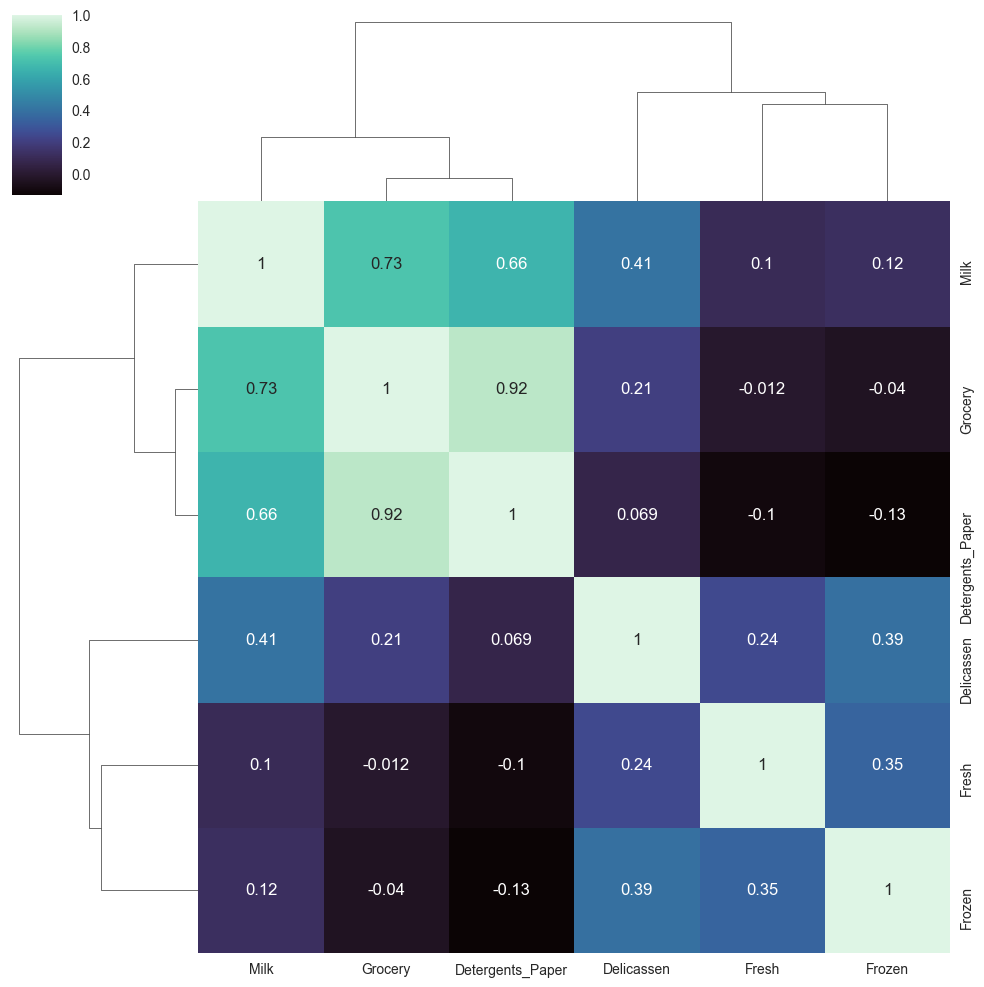

In [573]:
plt.figure
sns.clustermap(df.corr(),cmap="mako",annot=True)

> The following pairs of features show association in their behavior
> - Grocery and Detergents_Paper: 0.92
> - Milk and Grocery: 0.73
> - Milk and Detergents_Paper: 0.66
>
> For instance, the map shows that the correlationship between detergents paper and grocery amount 0.92, which is very close to 1.
>
> This means that they have strongly correlationship with each other.
>
> We can persume that most customers who purchase grocery, also buy detergents paper.

# Clustering

> #### Scaling
>
>Before cluster dataset, I am considering to normalize data. We can see in the dataframe that the data has higher range. 
>
>The clustering algorithm such as k-means algorithm is distance based and can have undesirable effect with range.
>
> So it is necessary to normalize it. 

In [574]:
# Normalize whole dataset
df_n = preprocessing.Normalizer().fit_transform(df)
df_n = pd.DataFrame(df_n, columns=df.columns,index=df.index)
df_n.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


> ### 1. K-Means
>
> The majority of Clustering is the choose of clusters(k). 
> To finding the optimal clusters I use Elbow Method and then proceeding k means with the chosen cluster.

> #### Elbow Method

In [575]:

inertias = []
for n in range(2, 12):
  # create clusters
       kmeans = (KMeans(n_clusters=n, 
              init='k-means++', 
              n_init=10,             
              random_state=42, 
              ))
       kmeans.fit(df_n)
       inertias.append(kmeans.inertia_)

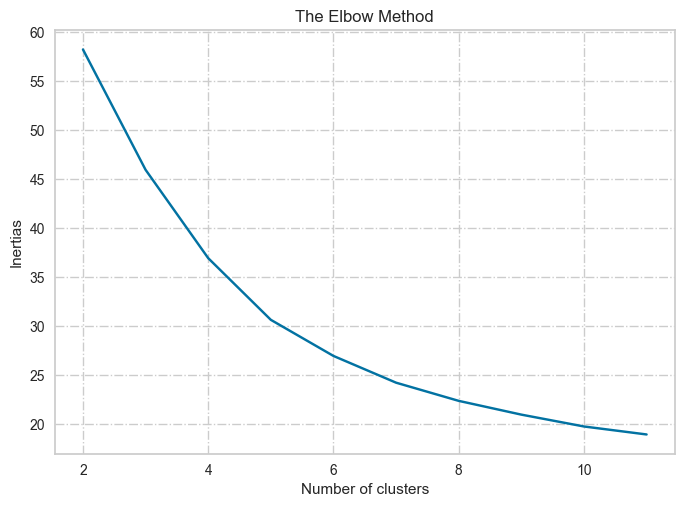

In [576]:
plt.plot(range(2, 12), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters'), plt.ylabel('Inertias')
plt.grid(linestyle='-.')
plt.show()

> To find the best number of clusters, I use KneeLocator from kneed library

The best clusters number is 5


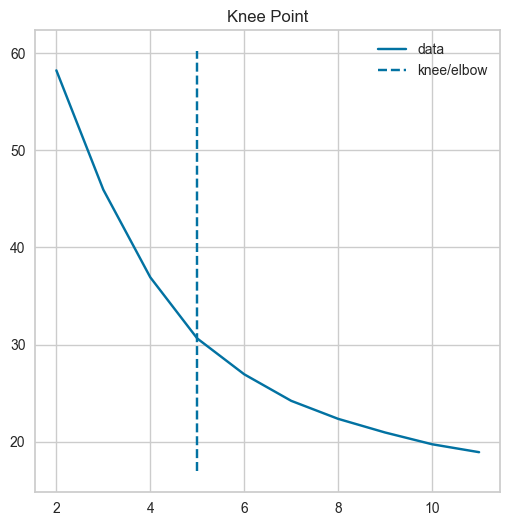

In [577]:
elbow = KneeLocator(x = range(2,12), y = inertias, curve ='convex', direction = 'decreasing')
elbow.plot_knee()
elbow.find_knee()
print(f'The best clusters number is {elbow.find_knee()[0]}')

In [578]:
cluster = kmeans.predict(df_n)
cluster

array([ 9,  3,  7,  5,  9,  9,  9,  3,  3,  1,  8,  0,  9,  9,  9,  0,  1,
        7,  9,  3,  9,  5,  0,  7,  9,  9,  5,  0,  1,  0,  9,  7,  0,  0,
        3,  8,  0,  3,  1,  0,  5,  0,  3,  8,  3,  6,  1,  3,  3,  1,  5,
        1,  0,  1,  0,  3,  1,  1,  0,  3,  3,  3,  3,  1,  4,  8,  8,  9,
        7,  0,  5,  3,  4,  5,  3,  0,  2,  1,  0,  1,  9,  8,  3,  0,  9,
        8,  6,  0,  4,  0,  0,  5,  1,  4,  1, 10,  8,  2,  2,  5,  3,  8,
        1,  5,  0,  0,  8,  1,  6, 10,  0,  3,  5,  0,  0,  0,  0,  9,  0,
        5,  0,  5,  0,  3,  0,  0,  5,  9,  6,  0,  4,  0,  0,  0,  0,  9,
        7,  6,  9,  7,  9,  0,  0,  4,  0,  3,  0,  9,  5,  0,  0,  7,  0,
        7,  0,  8,  8,  0,  1,  8, 10,  0,  0,  8,  1,  3,  1,  3,  0,  5,
        8,  6,  1,  8, 10,  1,  0,  9,  9,  7,  9,  0,  8,  7, 10,  9,  4,
        1,  3,  6,  5,  0,  9, 10,  9,  5,  5,  1,  9,  0,  8,  8,  9,  8,
       10,  8,  0,  1,  1,  1,  0,  1,  0,  1,  8,  1,  8,  0, 10,  5,  0,
        1,  4,  2,  0,  9

> Now I am gonna try it with the Silhouette score to see if there are any difference between this two methods

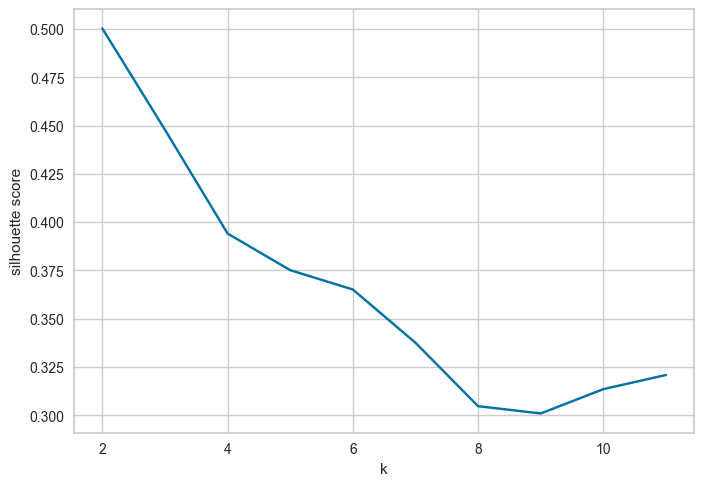

In [579]:
def silhouettes_score_plot(X):
    silhouettes = []
    for k in range(2,12):
        kmeans= KMeans(n_clusters=k, random_state=1)
        cluster_assignments = kmeans.fit_predict(X)
        silhouettes.append(silhouette_score(X,cluster_assignments))


    plt.plot(range(2,12), silhouettes)
    plt.xlabel('k')
    plt.ylabel('silhouette score')

silhouettes_score_plot(df_n)

> As the graph shown, The silhouette score reaches its peak while k = 2, so I decide to choose 2 as the cluster number. 

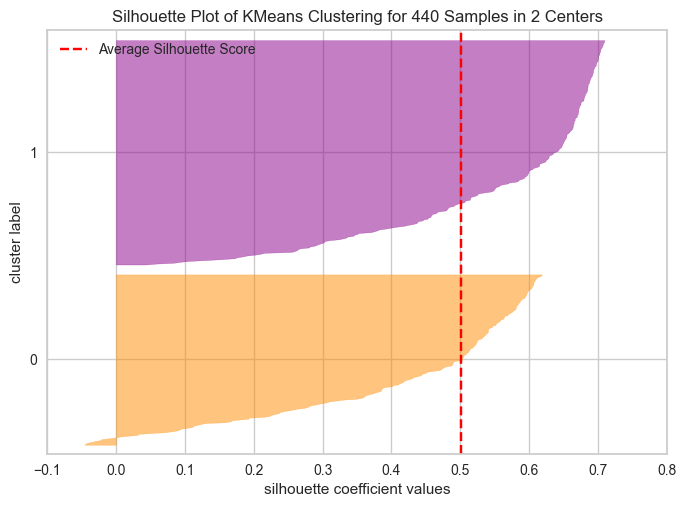

In [580]:
def plot_silhouette(X,k):
    colors=['darkorange', 'darkmagenta','darkblue','darkgreen','darkred']
    model = KMeans(k, random_state=1)
    visualizer = SilhouetteVisualizer(model, colors=colors)

    visualizer.fit(X) 
    visualizer.show() 
plot_silhouette(df_n,2) # k=2

> By k = 2, the Sihouette score above we can see that the average is around 0.5. 
>
>This amount is not very bad. Hoever, some points of cluster 0 are negativ, which means the clustering results of these points are not good. 
>
>Moreover, the silhouette coefficient values of cluster 1 is bigger than the other.

> Then I also use k = 5 (result from Elbow Method) for silhouette score to see the difference.

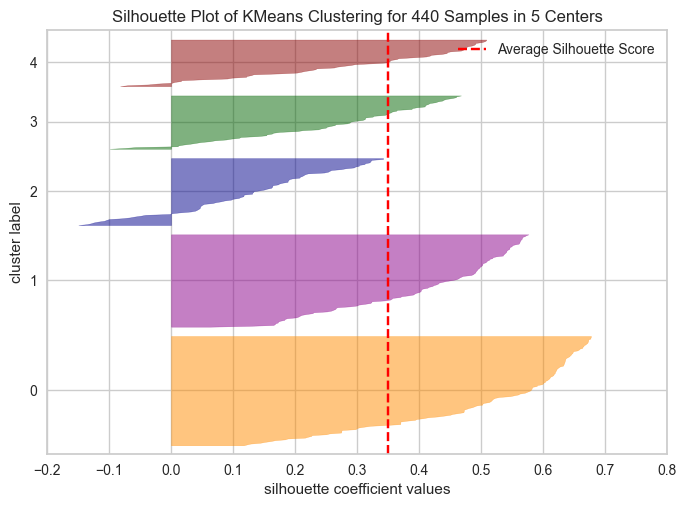

In [595]:
plot_silhouette(df_n,5) # k=5

> By k = 5,  the average of the Sihouette score is only 0.35 and there are also negative values of cluster 2, 3 and 4. So the result is bad. 
>
> To compare it, the result by k = 2 is better than the result of k = 5
> 
> Still, I don't think that kmeans is suitable for this case. 

In [581]:
kmean_model = KMeans(n_clusters=2) # k from Elbow Method
kmean_model.fit(df_n)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
print(centroids)
print(labels)

[[0.86957306 0.17495423 0.2260608  0.22490371 0.05007507 0.07400152]
 [0.26408303 0.47922149 0.66190661 0.13429499 0.25144995 0.10540875]]
[0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0

> ### 2. PCA (Principle Component Analysis)

In [582]:
df_n.shape

(440, 6)

> Now we have 6 features of our dateset, which means that we have 6 dimension. So now I will use PCA algorithm to reduce the dimension, so that I can plot the data into 2D diagramm. 
>
>But in this case I won't choose the specific Principle Components (PC) because we don't have so many features and all features of products are important for our goal.

In [583]:
pca_model = PCA(n_components=2)
pca_model.fit(df_n.values) # fit the model
df_n_pca = pca_model.transform(df_n.values) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)


> I also display the clustermap diagramm which I already computed in the 'Preprocessing step' here.
>
> In this case, we can easily compare the results.

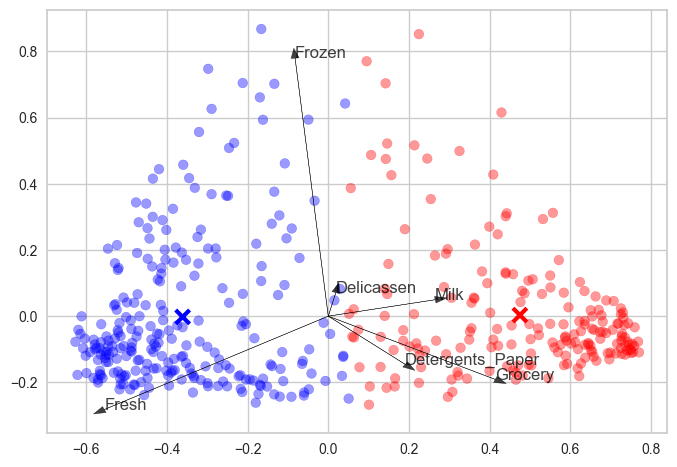

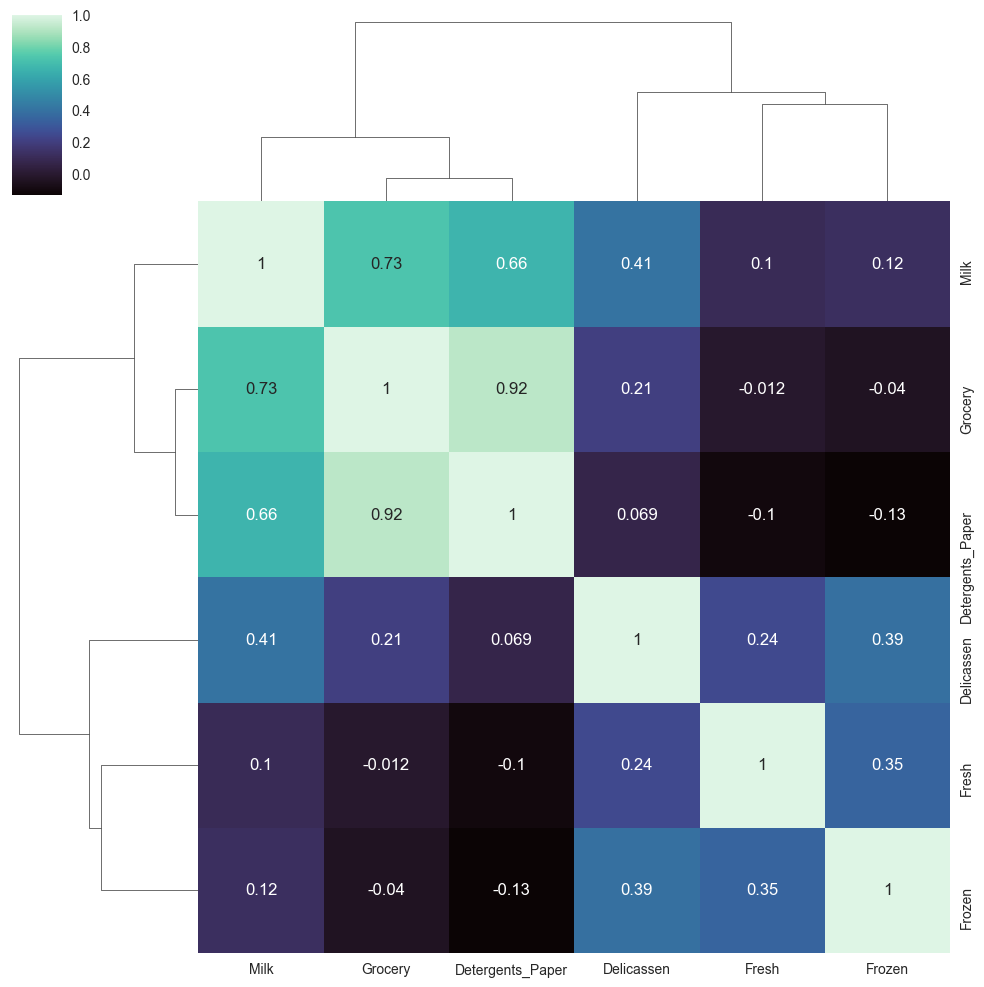

In [584]:
# set colors and assign color to each features
colors = ['blue', 'red']
features_colors = [colors[labels[i]] for i in range(len(df_n_pca))]

# plot the PCA components, in this case we go through all points of data
plt.scatter(df_n_pca[:, 0], df_n_pca[:, 1],c=features_colors, marker='o',alpha=0.4)

# plot the centroids of cluster
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],marker='x', s=100,linewidths=3, c=colors)

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(df_n_pca[:,0])
yvector = pca_model.components_[1] * max(df_n_pca[:,1])
columns = df.columns

# plot the name of features along with vector length
for i in range(len(columns)):
    plt.arrow(0, 0, xvector[i], yvector[i],color='black', width=0.0005,head_width=0.02, alpha=0.75)
    plt.text(xvector[i], yvector[i], list(columns)[i], color='black', alpha=0.75)

plt.show()
sns.clustermap(df.corr(),cmap="mako",annot=True)

> As we can see in the PCA diagramm, there are 2 clusters.
>
> - It is clearly that the product detergents paper, milk and grocery are in the same cluster (red).
>
> - So we can imagine that customers who buy grocery, also buy detergents paper and milk and vice versa.
>
> This result can also be seen in the clustermap (correlationship 0.92). They have a strong correlation.
>
> Another example like frozen products and grocery products are in two different clusters.
>
> The correlationship between these two are -0.04.
>
> So that we know there are rarely customers buy grocery and frozen products at the same time.

> ### 3. HAC
>
> Hierarchical Clustering is a type of clustering algorithm that creates a hierarchical nested clustering tree by calculating the similarity between data points of different categories. In a clustering tree, the original data points of different categories are the lowest level of the tree, and the top level of the tree is the root node of a cluster.
>
> In short, Hierarchical Clustering divides the dataset into one layer of clusters, and the clusters generated in the later layer are based on the results of the previous layer.
>
> Divisive and Agglomerative are the two types of Hierarchical Clustering.
> In this part I will use *scipy* library to compute the hierarchical algorithm with Agglomerative. 
>
>Agglomerative clustering thinks that every point or object is a single cluster at the beginning, each time the two closest clusters are merged according to certain criteria to generate a new cluster and so on, until all the objects belong to one cluster.

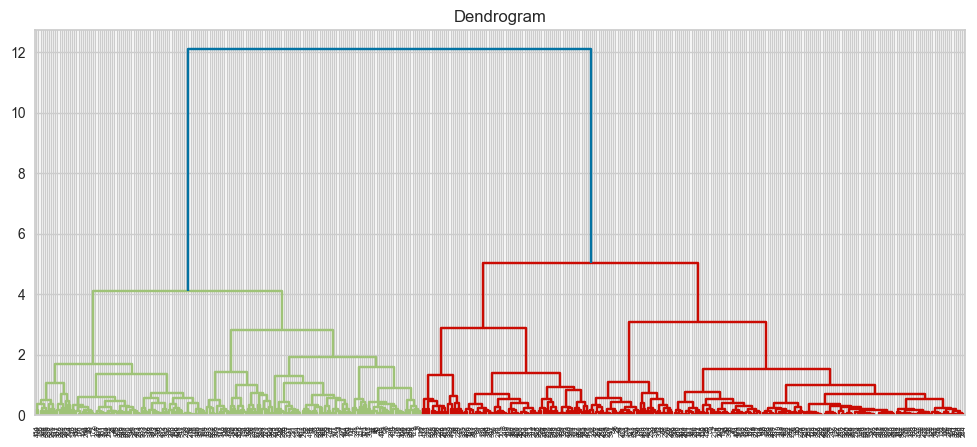

In [585]:
plt.figure(figsize=(12,5))  
plt.title("Dendrogram")  
dend = dendrogram(linkage(df_n, method='ward',metric='euclidean'),p=30)# only see the last 30 nodes

> It can be seen that the last two merges of the tree are much larger than the merge distance of the previous merge process, which shows that the last two merges are not reasonable. 
>
>So then I cut the dendrogram with a axisline y = 6 find the cluster number from the rest vertical line (without blue line)

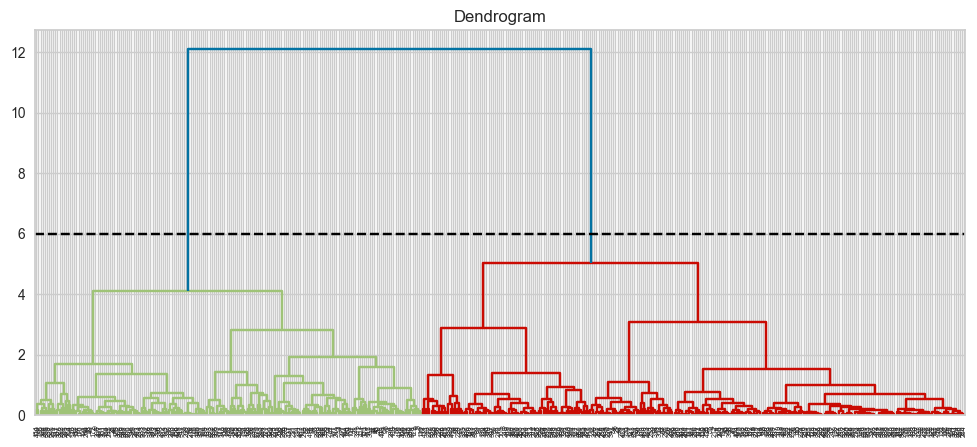

In [586]:
plt.figure(figsize=(12,5))  
plt.title("Dendrogram")  
dend = dendrogram(linkage(df_n, method='ward',metric='euclidean'),p=30,labels=df_n.index)
plt.axhline(y=6, color='black', linestyle='--')
plt.show()

> From the rest lines we see the optimal number of clusters is 2, and this result of k is the same as from the kmeans algorithm.

> ### Comparison with Average linkage
>
> Instead of 'ward', I use now 'complete' function to calculate the distance.
>
> The difference between the two functions is only the distance method. 'Wald linkage' minimizes the variance of the clusters being merged and 'average linkage' uses the average of the distances of each observation of the two sets.

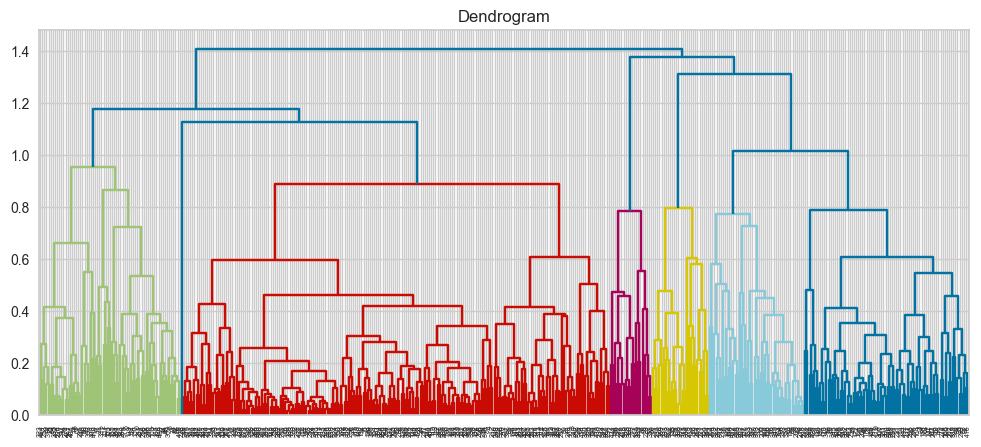

In [587]:
plt.figure(figsize=(12,5))  
plt.title("Dendrogram")  
dend = dendrogram(linkage(df_n, method='complete')) 

> However the result in dendrogram with 'average linkage' is hard to decide which number of clusters we should choose.
>
> So in this case, I think 'Wald linkage' is suitable to use.

> ### Scatter plot
> 
> In the following steps, I will use scatterplot to display the cluster with different kinds of features sets.

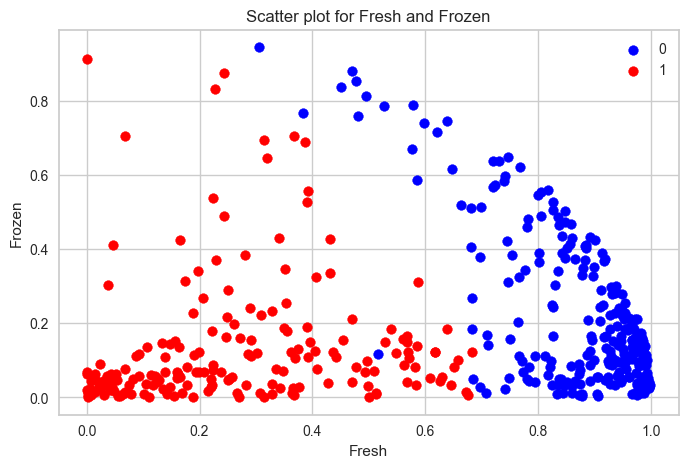

In [588]:
u_labels = np.unique(labels)
def scatterplot_features_set2(x,y,xlabel,ylabel):
    plt.figure(figsize=(8,5))
 
    for i in u_labels:
        plt.scatter(x[labels==i], y[labels==i], c=colors[i], label=i)
    plt.title('Scatter plot for '+ xlabel +' and '+ ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
# plot some example feature sets
scatterplot_features_set2(df_n['Fresh'],df_n['Frozen'],'Fresh','Frozen')

> The scatter plots show us again how the two features of a set are related with each other.
>
> For instance, we can see that in cluster 0, which customers bought a huge amont of Fresh products, also bought some frozen products.
>
> In cluster 1, most consumer who bought a few amount fresh products, would also buy a few frozen products. 

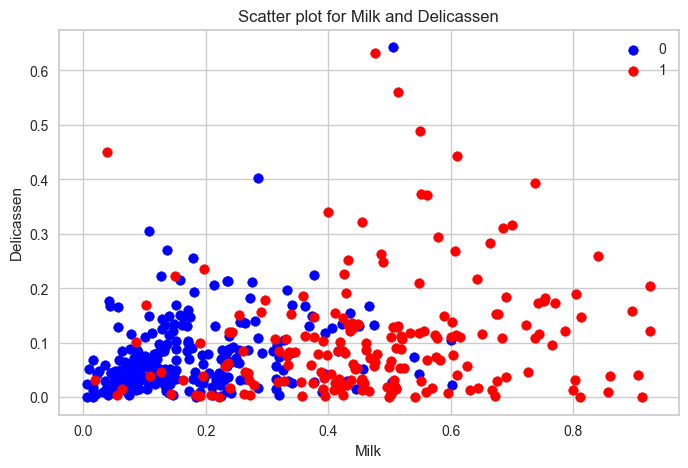

In [589]:
scatterplot_features_set2(df_n['Milk'],df_n['Delicassen'],'Milk','Delicassen')

> In this scatter plot we see that most customers in cluster 0 didn't buy much delicassen and milk
>
> In cluster 1, many customers bought milk and just a little delicassen products.

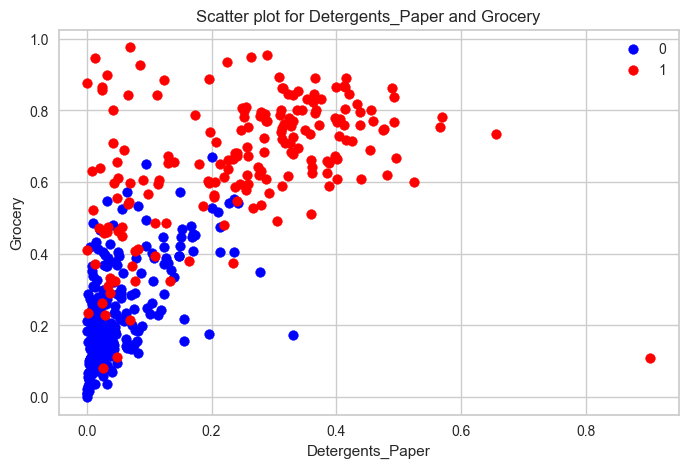

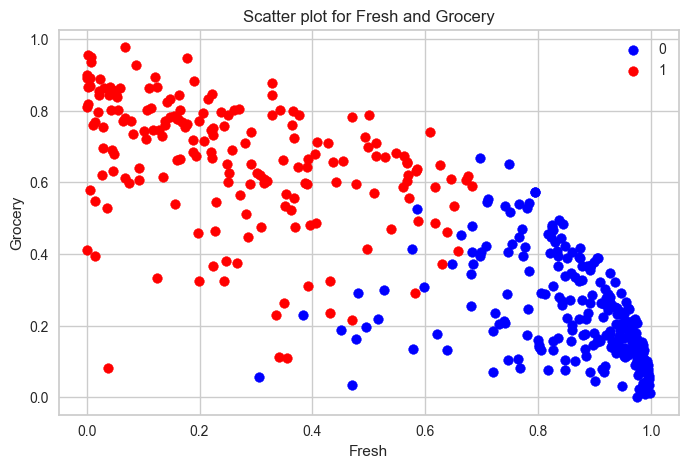

In [590]:
scatterplot_features_set2(df_n['Detergents_Paper'],df_n['Grocery'],'Detergents_Paper','Grocery')
scatterplot_features_set2(df_n['Fresh'],df_n['Grocery'],'Fresh','Grocery')

> In the scatter plot for Detergents paper and grocery we can see that in cluster 0, most custmors who bought some amount of grocery, didn't buy much detergents paper. The customers who bought very large amount of fresh products, didn't buy many grocery. But some customers bought medium amount of fresh products, also bought some gerocery.
>
> In cluster 1, many custmors who bought large amounts of grocery, bought also some detergents paper and low amounts of fresh products.

> ### Predication from scatter plot
>
> It is clearly that we now have 2 customer segmentation. 
> 
> After comparison of different features, I think the most customers of cluster 0 are fresh food shop such as butcher or fruits stores. For the reason that many customers bought a large amount of fresh products. Some of them might also be bistro because they buy grocery and some milk also frozen products.
>
> The customers of cluster 1 seems to be Cafe or bar. Because they bought many milk, grocery and also buy some delicassen and fresh products.

# Data Analyse

In [591]:
df['cluster']=labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [592]:
df_n['cluster']=labels
df_n.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,0
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,1
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,1
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0


In [593]:
cluster_means=df.groupby('cluster').mean() # compute the mean of dataset groupby 'cluster'
cluster_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,17446.696000,3119.504000,3929.972000,3925.072000,839.472000,1301.976000
1,4833.984211,9318.321053,13242.468421,1949.378947,5568.363158,1818.152632


In [594]:
cluster_n_means=df_n.groupby('cluster').mean()
cluster_n_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,0.869573,0.174954,0.226061,0.224904,0.050075,0.074002
1,0.264083,0.479221,0.661907,0.134295,0.251450,0.105409


> The customers of cluster 0 spent most on fresh product, and a little on grocery / frozen. Others products they only spent less than 0.2
>
> The customers of cluster 1 spent much on grocery, and milk just a few less than it. They also bought some fresh products and detergents paper but much less than grocery.
>
> The customers of both clusters spent very little amount on delicassen.

# Conclusion and advice

> #### Conclusion
>
> The result of this experiment is that we have now segmente the customer into 2 groups. 
>
> Group 0 are customers such as fresh food store or bistro, the most products they will buy is fresh products, then they will also buy a little grocery and frozen products.
>
> Group 1 are customers such as cafe, bar and cafe-restaurant. They buy many grocery and milk products. Other than this they buy fresh products and detergents paper as well. For this point, I would say hotel could also suitable in this group.
>
> #### Advice
>
> * The wholesaler could push advertising of products which are link to the products the customers buy. For instance, wenn customers buying fresh products, the online shop can push the advertisement of grocery or frozen product of the website. Or the wholesaler could place the shopping-link of these products on the fresh products site. Then the customers will see it by looking fresh products. 
> * The wholesaler can also provide discounted combinations according to the customer's needs. Such as a discounted combination of grocery and detergents paper, or a discount package of milk and grocery. 


> From the site of wholesaler, they now know which type of customers they have and what their shopping habits and preferences are. For the customer site, ordering the products online could save time and engine cost. They could also recieve suitable advertisment of what they might need. This is a win-win for both the merchant and the customer.
